In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cars = pd.read_csv("autos.csv",encoding='latin1')
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Dropping null values

In [5]:
print('number of obs',len(cars))
cars = cars.dropna()
print('number of obs after dropna',len(cars))
print('freq of  null per column')
cars.isnull().sum()

number of obs 371528
number of obs after dropna 260956
freq of  null per column


dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

Dropping the columns abtest,noofpictures,offertype, datecrawled,Seller,name
Reason: 
abtest,noofpictures values are same for all

offertype : as there are only two types Angepbot(Offer) which is the majority and Guesh(Request) is only handful so this would not effect the output 

datecrawled : just gives when the system got the data

Seller : has two types private and commercial which willnot effect the price it doesnot matter who sells the vehicle

name : as the columns model and brand already has this info

postalcode : as we cannot directly determine it based on postal code


In [6]:
cars = cars.iloc[:,[3,6,7,8,9,10,11,12,13,14,15,4]]
cars.columns

Index(['offerType', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'price'],
      dtype='object')

In [7]:
print('Vehicle Type: ',cars.vehicleType.unique())
print('Gearbox: ',cars.gearbox.unique())
print('Fuel Type: ',cars.fuelType.unique())
print('Repaired Damage: ',cars.notRepairedDamage.unique())

Vehicle Type:  ['kleinwagen' 'limousine' 'cabrio' 'kombi' 'suv' 'bus' 'coupe' 'andere']
Gearbox:  ['manuell' 'automatik']
Fuel Type:  ['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
Repaired Damage:  ['nein' 'ja']


Translation to english: "the dataset is in germany"

In [8]:
cars.replace({'gearbox':{'manuell':'manual','automatik':'automatic'}},inplace=True)
cars.replace({'vehicleType':{'kleinwagen':'small_car','kombi':'combi','andere':'Others'}},inplace=True)
cars.replace({'fuelType':{'benzin':'petrol','andere':'others','elektro':'electro'}},inplace=True)
cars.replace({'notRepairedDamage':{'nein':'no','ja':'yes'}},inplace=True)

In [9]:
cars.head(10)

,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
3,Angebot,small_car,2001,manual,75,golf,150000,6,petrol,volkswagen,no,1500
4,Angebot,small_car,2008,manual,69,fabia,90000,7,diesel,skoda,no,3600
5,Angebot,limousine,1995,manual,102,3er,150000,10,petrol,bmw,yes,650
6,Angebot,cabrio,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2200
7,Angebot,limousine,1980,manual,50,andere,40000,7,petrol,volkswagen,no,0
10,Angebot,limousine,2004,manual,105,3_reihe,150000,12,petrol,mazda,no,2000
11,Angebot,combi,2005,manual,140,passat,150000,12,diesel,volkswagen,yes,2799
14,Angebot,suv,2011,manual,190,navara,70000,3,diesel,nissan,no,17999
17,Angebot,small_car,2004,automatic,75,twingo,150000,2,petrol,renault,no,1750
18,Angebot,bus,2007,manual,136,c_max,150000,6,diesel,ford,no,7550


These Histograms shows that ours continues predictors are skewed so applying log tronsformation will probably improve our model

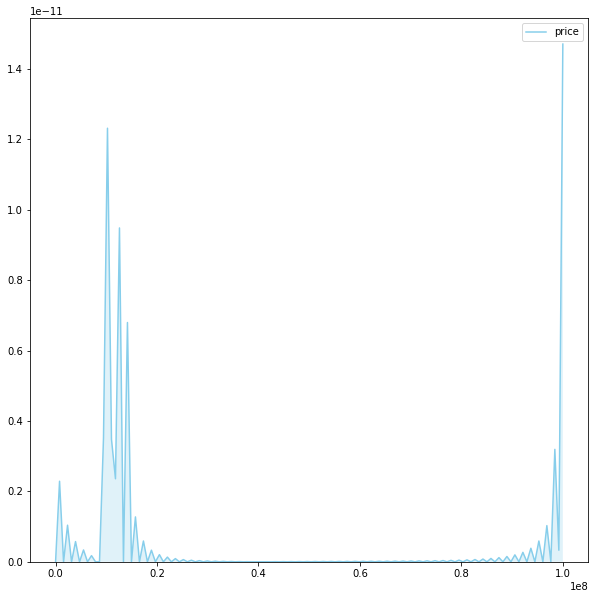

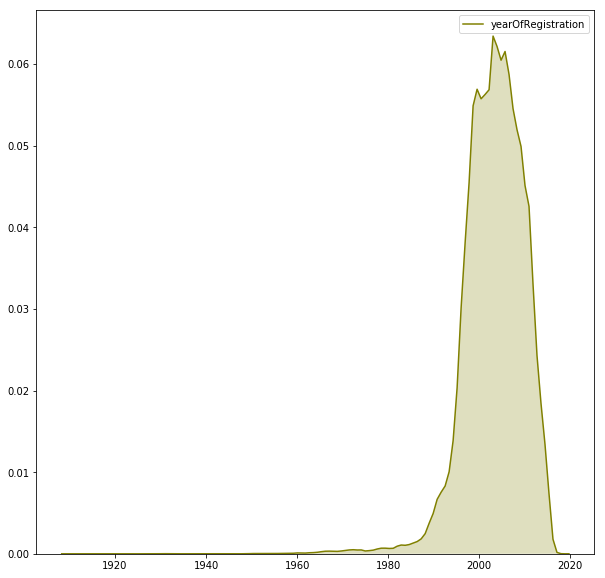

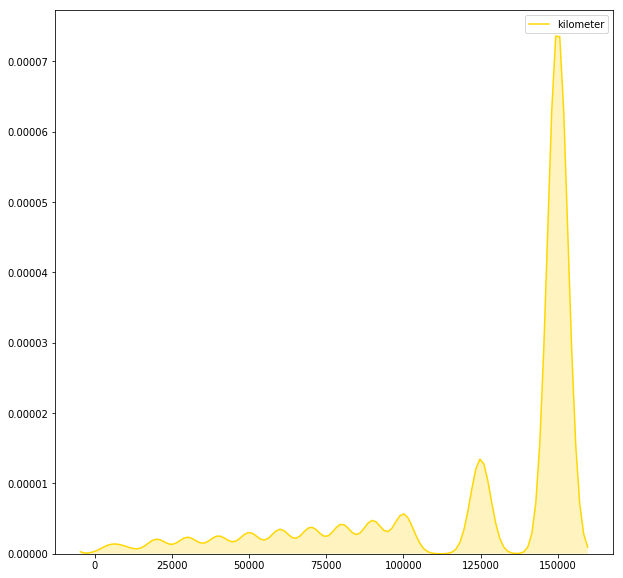

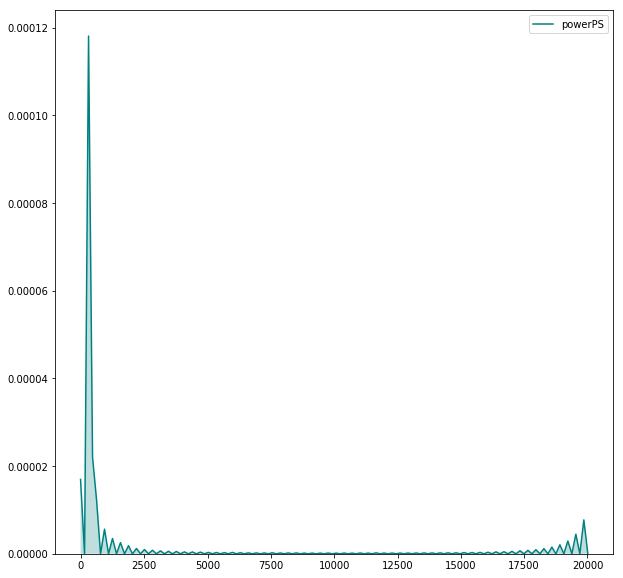

In [10]:
#sns.pairplot(cars[['powerPS']])
#cars[['powerPS']].plot.kde(xlim=(0,1000))
#sns.kdeplot(cars.loc[(cars.kilometer>1000)&(cars.kilometer<20000)].kilometer, shade=True)
#cars.kilometer.max()
#cars.loc[(cars.price>400)&(cars.price<200000)].max()


f, axes = plt.subplots(figsize=(10,10), sharex=True)
sns.kdeplot( cars.price ,shade=True, color="skyblue", ax=axes)

f, axes = plt.subplots(figsize=(10,10), sharex=True)
sns.kdeplot( cars.yearOfRegistration ,shade=True, color="olive", ax=axes)

f, axes = plt.subplots(figsize=(10,10), sharex=True)
sns.kdeplot( cars.kilometer ,shade=True, color="gold", ax=axes)

f, axes = plt.subplots(figsize=(10,10), sharex=True)
sns.kdeplot( cars.powerPS ,shade=True, color="teal", ax=axes)




In [11]:
cars = cars.loc[(cars.price>400)&(cars.price<=40000)]
cars = cars.loc[(cars.yearOfRegistration>1990)&(cars.yearOfRegistration<=2018)]
cars = cars.loc[(cars.monthOfRegistration>0)&(cars.monthOfRegistration<=12)]
cars = cars.loc[(cars.powerPS>50)&(cars.powerPS<3000)]
cars = cars.loc[(cars.kilometer>1000)&(cars.kilometer<=150000)]
cars = cars.loc[(cars.offerType=='Angebot')]

mean of price per year


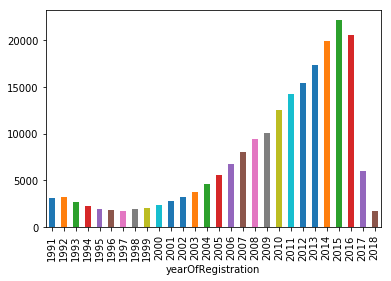

In [12]:
print("mean of price per year")
groups  = cars.groupby('yearOfRegistration')['price'].mean()
groups.plot.bar()

mean of price per kilometer


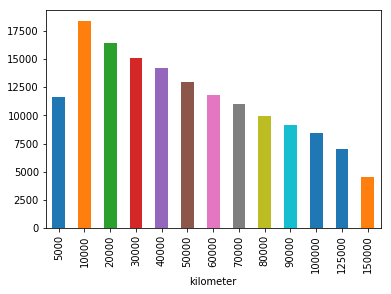

In [167]:
print("mean of price per kilometer")
groups  = cars.groupby('kilometer')['price'].mean()
groups.plot.bar()

mean of price per powerPS


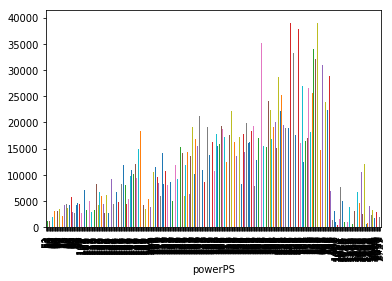

In [13]:
print("mean of price per powerPS")
groups  = cars.groupby('powerPS')['price'].mean()
groups.plot.bar()

We have two date columns yearOfRegistration & monthOfRegistration: we will create new column thatcapture the information in them

In [14]:
Date_reg =(cars.yearOfRegistration*100)+cars.monthOfRegistration
cars['Date_reg']=Date_reg
cars.drop(['yearOfRegistration', 'monthOfRegistration','offerType'],inplace=True, axis=1)
cars.head(10)

,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,price,Date_reg
3,small_car,manual,75,golf,150000,petrol,volkswagen,no,1500,200106
4,small_car,manual,69,fabia,90000,diesel,skoda,no,3600,200807
5,limousine,manual,102,3er,150000,petrol,bmw,yes,650,199510
6,cabrio,manual,109,2_reihe,150000,petrol,peugeot,no,2200,200408
10,limousine,manual,105,3_reihe,150000,petrol,mazda,no,2000,200412
11,combi,manual,140,passat,150000,diesel,volkswagen,yes,2799,200512
14,suv,manual,190,navara,70000,diesel,nissan,no,17999,201103
17,small_car,automatic,75,twingo,150000,petrol,renault,no,1750,200402
18,bus,manual,136,c_max,150000,diesel,ford,no,7550,200706
19,bus,manual,102,a_klasse,150000,petrol,mercedes_benz,no,1850,200401


In [170]:
cars=pd.get_dummies(data=cars,columns=['notRepairedDamage','vehicleType','model','brand','gearbox','fuelType'],drop_first=True)
cars.head(10)


,powerPS,kilometer,price,Date_reg,notRepairedDamage_yes,vehicleType_bus,vehicleType_cabrio,vehicleType_combi,vehicleType_coupe,vehicleType_limousine,...,brand_toyota,brand_volkswagen,brand_volvo,gearbox_manual,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_others,fuelType_petrol
3,75,150000,1500,200106,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,69,90000,3600,200807,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
5,102,150000,650,199510,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
6,109,150000,2200,200408,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10,105,150000,2000,200412,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
11,140,150000,2799,200512,1,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
14,190,70000,17999,201103,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
17,75,150000,1750,200402,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18,136,150000,7550,200706,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
19,102,150000,1850,200401,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


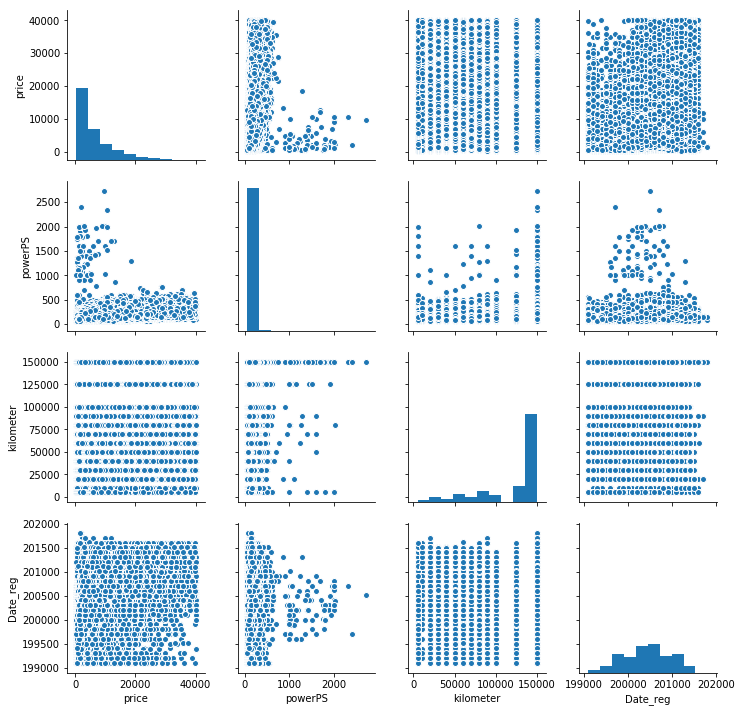

In [15]:
sns.pairplot(cars[['price','powerPS','kilometer','Date_reg']])


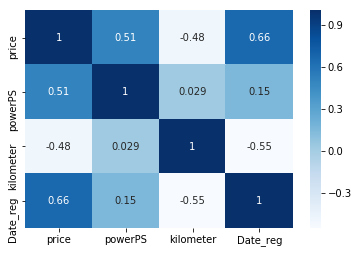

In [16]:
sns.heatmap(cars[['price','powerPS','kilometer','Date_reg']].corr(),cmap = 'Blues', annot=True)


In [17]:
#normlzation
cars["price"] = np.log1p(cars["price"])
#cars["kilometer"] = np.log1p(cars["kilometer"])
#cars["Date_reg"] = np.log1p(cars["Date_reg"])
cars["powerPS"] = np.log1p(cars["powerPS"])



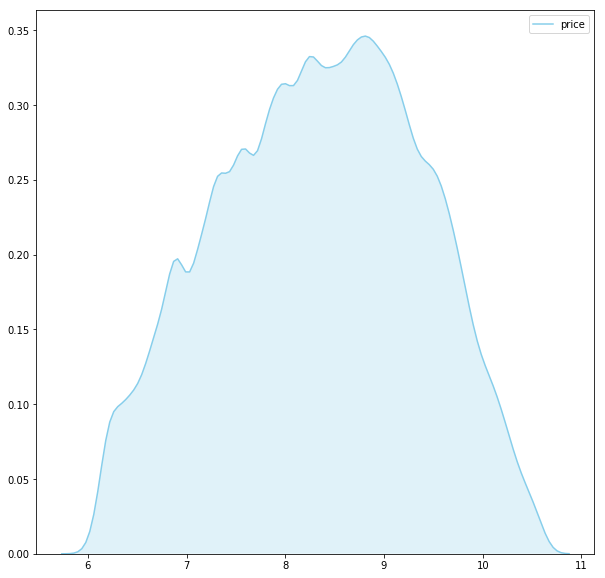

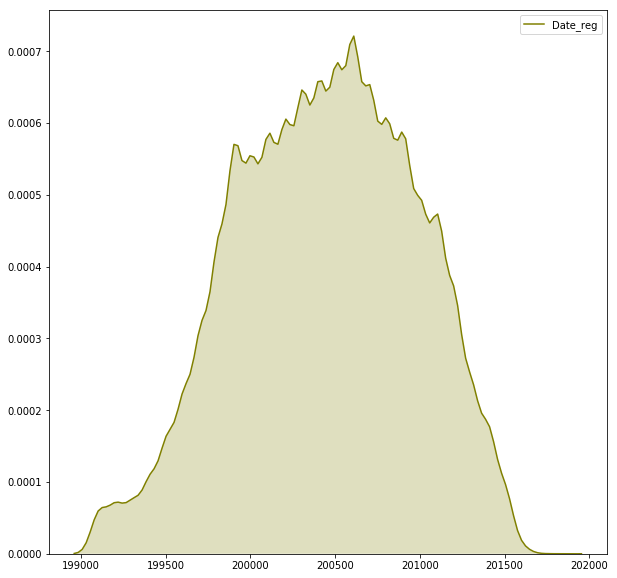

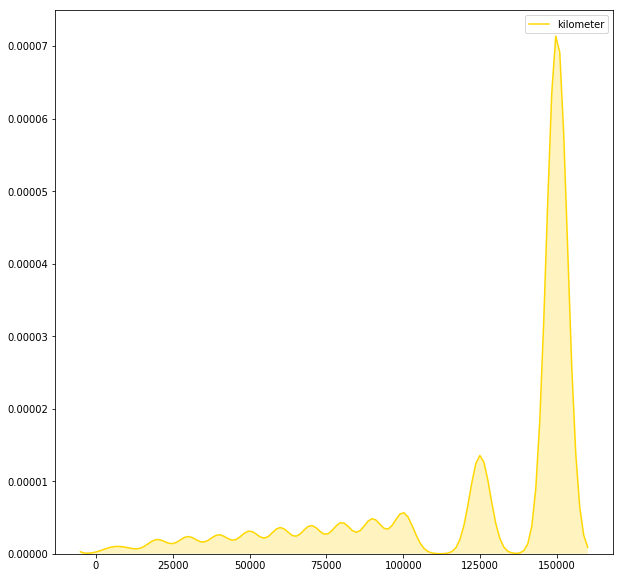

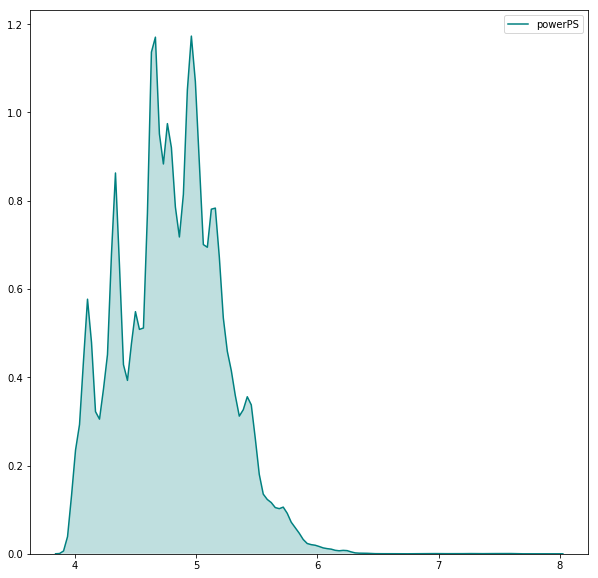

In [18]:

f, axes = plt.subplots(figsize=(10,10), sharex=True)
sns.kdeplot( cars.price ,shade=True, color="skyblue", ax=axes)

f, axes = plt.subplots(figsize=(10,10), sharex=True)
sns.kdeplot( cars.Date_reg ,shade=True, color="olive", ax=axes)

f, axes = plt.subplots(figsize=(10,10), sharex=True)
sns.kdeplot( cars.kilometer ,shade=True, color="gold", ax=axes)

f, axes = plt.subplots(figsize=(10,10), sharex=True)
sns.kdeplot( cars.powerPS ,shade=True, color="teal", ax=axes)

In [19]:
y = cars.price
X = cars.drop('price',axis=1)


In [20]:
X.head()


,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Date_reg
3,small_car,manual,4.330733,golf,150000,petrol,volkswagen,no,200106
4,small_car,manual,4.248495,fabia,90000,diesel,skoda,no,200807
5,limousine,manual,4.634729,3er,150000,petrol,bmw,yes,199510
6,cabrio,manual,4.700480,2_reihe,150000,petrol,peugeot,no,200408
10,limousine,manual,4.663439,3_reihe,150000,petrol,mazda,no,200412


In [21]:
y.head()


3     7.313887
4     8.188967
5     6.478510
6     7.696667
10    7.601402
Name: price, dtype: float64

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=123)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

ValueError: could not convert string to float: 'no'

In [26]:
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)



ValueError: could not convert string to float: 'no'

In [179]:
xlabels = X_train.columns.get_values()
stats.summary(linreg, X_train, y_train, xlabels)

Residuals:
Min      1Q  Median      3Q     Max
-3.1955 -0.2163 -0.0251  0.1943  4.7551


Coefficients:
                            Estimate  Std. Error      t value   p value
_intercept               -230.852781    0.532881    -433.2167  0.000000
powerPS                     0.709457    0.003282     216.1772  0.000000
kilometer                  -0.000004    0.000000    -176.2928  0.000000
Date_reg                    0.001177    0.000000  112730.6973  0.000000
notRepairedDamage_yes      -0.491676    0.003295    -149.2369  0.000000
vehicleType_bus             0.016729    0.007700       2.1726  0.029815
vehicleType_cabrio          0.358039    0.008012      44.6889  0.000000
vehicleType_combi          -0.065125    0.006841      -9.5198  0.000000
vehicleType_coupe           0.112578    0.008469      13.2926  0.000000
vehicleType_limousine       0.005791    0.006572       0.8812  0.378224
vehicleType_small_car       0.000840    0.007395       0.1136  0.909581
vehicleType_suv             0.231

R-squared:  0.86030,    Adjusted R-squared:  0.86006
F-statistic: 3693.90 on 299 features


In [180]:
print(linreg.score(X_test, y_test)*100,'% R2')
print(stats.adj_r2_score(linreg, X_test, y_test)*100,'% ADJ R2')


86.08414749645907 % R2
85.99088648786199 % ADJ R2


Text(0,0.5,'Predicted Y')

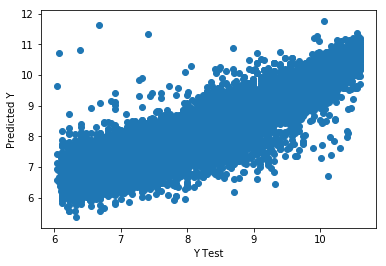

In [181]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [182]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [183]:
# steps
steps = [('scaler', StandardScaler()),
         ('ridge', Ridge())]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)
# Specify the hyperparameter space
parameters = {'ridge__alpha':np.logspace(-4, 0, 50)}
# Create the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters,n_jobs=4)
# Fit to the training set
cv.fit(X_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'ridge__alpha': array([1.00000e-04, 1.20679e-04, 1.45635e-04, 1.75751e-04, 2.12095e-04,
       2.55955e-04, 3.08884e-04, 3.72759e-04, 4.49843e-04, 5.42868e-04,
       6.55129e-04, 7.90604e-04, 9.54095e-04, 1.15140e-03, 1.38950e-03,
       1.67683e-03, 2.02359e-03, 2.44205e-03, 2.94705e-0... 3.23746e-01, 3.90694e-01,
       4.71487e-01, 5.68987e-01, 6.86649e-01, 8.28643e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [184]:
scaler = cv.best_estimator_.named_steps['scaler']
regss = cv.best_estimator_.named_steps['ridge']
list(zip(X_train.columns.get_values(), regss.coef_))


[('powerPS', 0.2939962650344704),
 ('kilometer', -0.14135091338934272),
 ('Date_reg', 0.6167443061182676),
 ('notRepairedDamage_yes', -0.13629414107952398),
 ('vehicleType_bus', 0.005047165928245395),
 ('vehicleType_cabrio', 0.09252760703132229),
 ('vehicleType_combi', -0.026829231036542042),
 ('vehicleType_coupe', 0.0250220192285297),
 ('vehicleType_limousine', 0.0026208513479943655),
 ('vehicleType_small_car', 0.00030489489279504633),
 ('vehicleType_suv', 0.04949385131346508),
 ('model_145', -0.002616366782317769),
 ('model_147', -0.011375876584091324),
 ('model_156', -0.018411854173277706),
 ('model_159', 0.005077449442805553),
 ('model_1_reihe', -0.0025515901421247524),
 ('model_1er', -0.00481600902322386),
 ('model_2_reihe', -0.007404603674998699),
 ('model_300c', 0.016126235953535534),
 ('model_3_reihe', -0.0018049595631740721),
 ('model_3er', -0.01497820553081164),
 ('model_4_reihe', -0.001926934976748944),
 ('model_500', 0.008855585547402125),
 ('model_5_reihe', 0.0104271684841

In [185]:
scaler.scale_,regss.coef_


(array([4.14397985e-01, 3.95753261e+04, 5.23808608e+02, 2.77203210e-01,
        3.02487851e-01, 2.58485773e-01, 4.11538491e-01, 2.22418433e-01,
        4.58209454e-01, 4.03259695e-01, 2.14312794e-01, 1.00090678e-02,
        4.17699641e-02, 4.02825857e-02, 2.77045958e-02, 5.17807244e-02,
        1.19041023e-01, 1.24818494e-01, 2.32299209e-02, 1.02373167e-01,
        2.42257531e-01, 4.51510785e-02, 5.55448071e-02, 3.97278232e-02,
        1.66140694e-01, 6.30478607e-02, 2.58359639e-02, 5.82183614e-02,
        5.28389658e-02, 2.38207758e-02, 6.24194153e-03, 1.58245364e-02,
        9.13706334e-03, 2.81029304e-02, 5.04812365e-02, 3.56017057e-02,
        1.44092959e-01, 1.78204484e-01, 6.30916355e-02, 1.39558019e-01,
        4.41578614e-02, 1.11718549e-01, 3.18994636e-02, 3.41692001e-02,
        3.59122432e-02, 4.00754555e-02, 3.56795948e-02, 1.15572830e-02,
        2.50321057e-01, 1.82718377e-02, 2.17463232e-02, 1.69329340e-01,
        2.94545776e-02, 4.54569728e-02, 1.94514234e-02, 3.880931

In [186]:
#Predicting the test set results
print(cv.score(X_train, y_train)*100,'% R2')
adjusted_r_squared = 1 - (1-cv.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(adjusted_r_squared*100,'% adj R2 ')

86.02962232480446 % R2
86.0063326499406 % adj R2 


In [187]:
# rmse on train set
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 0.38408559484020316


In [188]:
#Predicting the test set results
y_pred_test=cv.predict(X_test)
print(cv.score(X_test, y_test)*100,'% R2')
adjusted_r_squared = 1 - (1-cv.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adjusted_r_squared*100,'% adj R2 ')


86.0841719944189 % R2
85.9909111500018 % adj R2 


In [189]:
pd.DataFrame(cv.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.515744,0.405741,0.906211,0.207067,0.0001,{'ridge__alpha': 0.0001},0.858174,0.857802,0.862766,0.859581,0.002257,50,0.861135,0.861344,0.858833,0.860437,0.001138
1,4.716646,0.358510,0.695033,0.181417,0.000120679,{'ridge__alpha': 0.00012067926406393288},0.858174,0.857802,0.862766,0.859581,0.002257,49,0.861135,0.861344,0.858833,0.860437,0.001138
2,4.906382,0.372024,0.791027,0.112292,0.000145635,{'ridge__alpha': 0.00014563484775012445},0.858174,0.857802,0.862766,0.859581,0.002257,48,0.861135,0.861344,0.858833,0.860437,0.001138
3,5.013617,0.528623,0.643482,0.145317,0.000175751,{'ridge__alpha': 0.00017575106248547912},0.858174,0.857802,0.862766,0.859581,0.002257,47,0.861135,0.861344,0.858833,0.860437,0.001138
4,4.813799,0.351842,0.687757,0.036659,0.000212095,{'ridge__alpha': 0.00021209508879201905},0.858174,0.857802,0.862766,0.859581,0.002257,46,0.861135,0.861344,0.858833,0.860437,0.001138
5,4.907688,0.067854,0.744439,0.214386,0.000255955,{'ridge__alpha': 0.0002559547922699536},0.858174,0.857802,0.862766,0.859581,0.002257,45,0.861135,0.861344,0.858833,0.860437,0.001138
6,5.424079,0.416184,0.688052,0.104716,0.000308884,{'ridge__alpha': 0.00030888435964774815},0.858174,0.857802,0.862766,0.859581,0.002257,44,0.861135,0.861344,0.858833,0.860437,0.001138
7,5.467682,0.542182,0.746349,0.035482,0.000372759,{'ridge__alpha': 0.0003727593720314938},0.858174,0.857802,0.862766,0.859581,0.002257,43,0.861135,0.861344,0.858833,0.860437,0.001138
8,5.188368,0.456615,0.830209,0.196981,0.000449843,{'ridge__alpha': 0.0004498432668969444},0.858174,0.857802,0.862766,0.859581,0.002257,42,0.861135,0.861344,0.858833,0.860437,0.001138
9,5.366733,0.597460,0.574116,0.038211,0.000542868,{'ridge__alpha': 0.0005428675439323859},0.858174,0.857802,0.862766,0.859581,0.002257,41,0.861135,0.861344,0.858833,0.860437,0.001138
